<a href="https://colab.research.google.com/github/Arzoo-thind/Plant-Disease-Detection-AI-Model/blob/main/Another_copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gdown

# Replace 'your_file_id_here' with the actual file ID from Google Drive
file_id = "1xkJ563Io0-_2cCFdH36hLET7BRN1628d"
output = "output.zip"  # Specify the output file name

# Construct the Google Drive URL
url = f"https://drive.google.com/uc?id={file_id}"

# Download the file
gdown.download(url, output, quiet=False)

print(f"File downloaded and saved to: {output}")

# Unzip the dataset
!unzip -q output.zip

!ls cam photos

Downloading...
From (original): https://drive.google.com/uc?id=1xkJ563Io0-_2cCFdH36hLET7BRN1628d
From (redirected): https://drive.google.com/uc?id=1xkJ563Io0-_2cCFdH36hLET7BRN1628d&confirm=t&uuid=089d512d-2b0b-41ba-a819-0aacafd9cfeb
To: /content/output.zip
100%|██████████| 104M/104M [00:01<00:00, 61.2MB/s]


File downloaded and saved to: output.zip
ls: cannot access 'cam': No such file or directory
ls: cannot access 'photos': No such file or directory


In [ ]:
import os

# Path to the dataset
dataset_path = "cam photos"

# List all classes
classes = os.listdir(dataset_path)
print(f"Number of classes: {len(classes)}")
print("Classes:", classes)

# Count images per class
for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)
    print(f"{class_name}: {len(os.listdir(class_path))} images")

Number of classes: 7
Classes: ['Cherry_(including_sour)___Powdery_mildew', 'Apple___Apple_scab', 'Apple___healthy', 'Cherry_(including_sour)___healthy', 'Apple___Black_rot', 'Blueberry___healthy', 'Apple___Cedar_apple_rust']
Cherry_(including_sour)___Powdery_mildew: 23 images
Apple___Apple_scab: 10 images
Apple___healthy: 17 images
Cherry_(including_sour)___healthy: 21 images
Apple___Black_rot: 10 images
Blueberry___healthy: 26 images
Apple___Cedar_apple_rust: 10 images


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf

# Set random seeds for reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Data generators
data_gen = ImageDataGenerator(
    rescale=1.0/255,        # Normalize pixel values
    rotation_range=20,              # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,          # Randomly shift images horizontally by up to 20% of the width
    height_shift_range=0.2,         # Randomly shift images vertically by up to 20% of the height
    shear_range=0.2,                # Apply random shearing transformations
    zoom_range=0.3,                 # Randomly zoom in on images
    horizontal_flip=True,           # Randomly flip images horizontally
    fill_mode='nearest',            # Strategy for filling in new pixels created by transformations
    validation_split=0.1,           # Reserve 10% for validation
    brightness_range=[0.5, 1.5],
    channel_shift_range=0.2
)

# Training generator with a fixed seed
train_generator = data_gen.flow_from_directory(
   dataset_path,
   target_size=(128, 128),  # Resize all images to 128x128
    subset='training',       # Training split
    seed=SEED)                # Fixed seed for reproducibility

# Validation generator with the same seed
val_generator = data_gen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=64,
    class_mode='categorical',
    subset='validation',     # Validation split
    seed=SEED                # Fixed seed for reproducibility
)

Found 107 images belonging to 7 classes.
Found 10 images belonging to 7 classes.


In [ ]:
 print("Training class indices:", train_generator.class_indices)
 print("Validation class indices:", val_generator.class_indices)

Training class indices: {'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6}
Validation class indices: {'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6}


In [ ]:
 train_filenames = set(train_generator.filenames)
 val_filenames = set(val_generator.filenames)

 overlap = train_filenames.intersection(val_filenames)
 print(f"Number of overlapping files: {len(overlap)}")

Number of overlapping files: 0


In [ ]:
print("Class indices:", train_generator.class_indices)


Class indices: {'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6}


indices: [8 1 5 0 7 2 9 4 3 6]


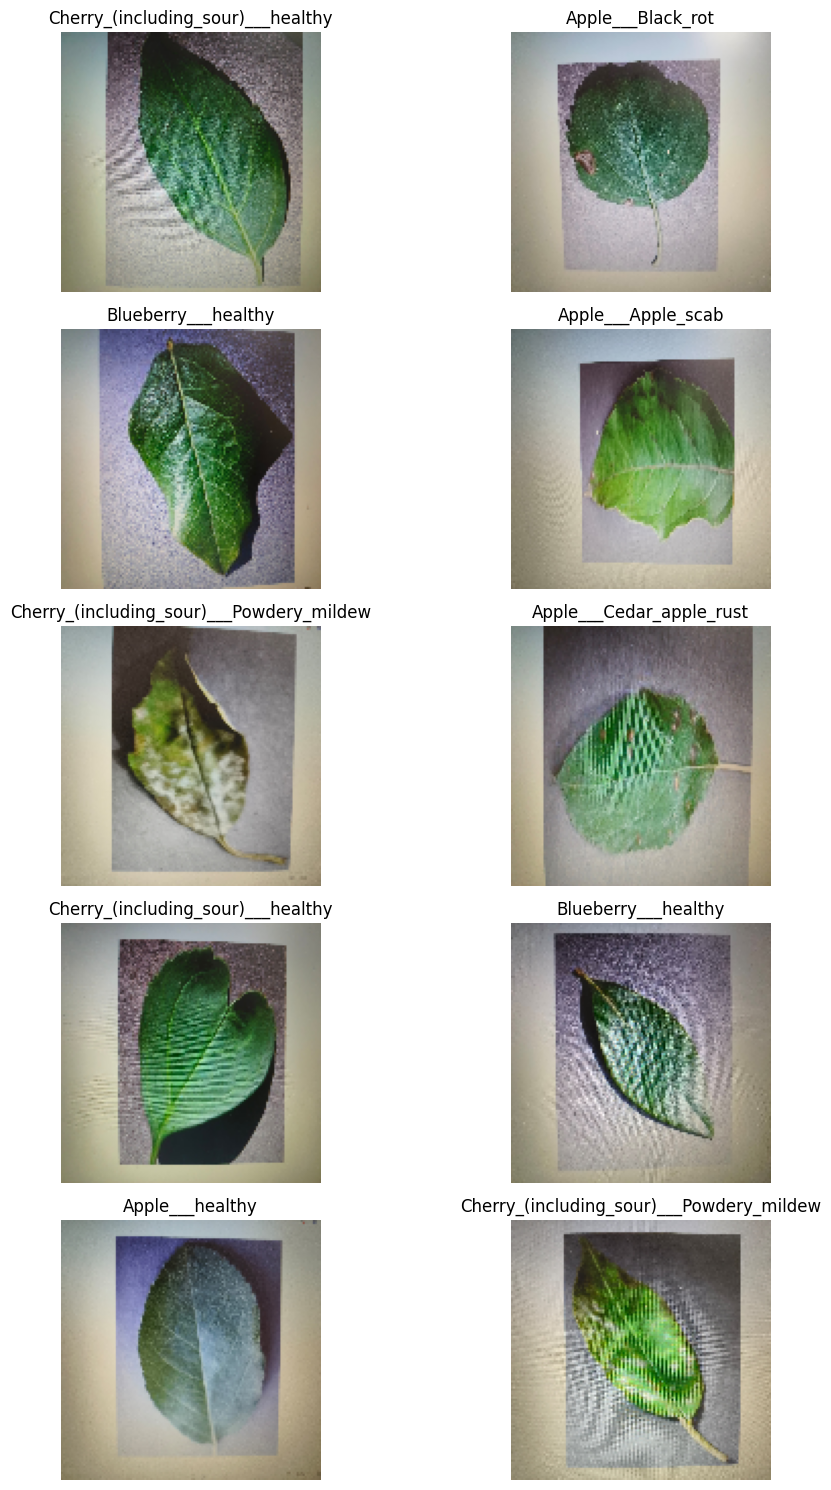

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def visualize_validation_images(val_generator, num_images=10):
    """
    Display a subset of images from the validation set.

    Args:
        val_generator: The validation data generator.
        num_images: Number of images to display.
    """
    if len(val_generator.filepaths) == 0:
        print("Validation set is empty. Cannot visualize images.")
        return

    # Get random indices for the validation images
    indices = np.random.choice(range(len(val_generator.filepaths)), min(num_images, len(val_generator.filepaths)), replace=False)
    print('indices:', indices)

    plt.figure(figsize=(15, 15))
    for i, idx in enumerate(indices):
        # Get the image path and true label
        image_path = val_generator.filepaths[idx]
        true_label = list(val_generator.class_indices.keys())[val_generator.classes[idx]]


        # Load and preprocess the image
        img = load_img(image_path, target_size=(128, 128))  # Resize image for display
        img_array = img_to_array(img) / 255.0              # Normalize pixel values

        # Display the image
        plt.subplot(5, 2, i + 1)
        plt.imshow(img_array)
        plt.axis("off")
        plt.title(f"{true_label}")
        plt.tight_layout()
    plt.show()

# Call the function to visualize validation images
visualize_validation_images(val_generator, num_images=10)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Number of classes
num_classes = len(train_generator.class_indices)

model_plant = Sequential([
    Conv2D(64, (4, 4), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')  # Output layer
])

model_plant.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_plant.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 125, 125, 64)   │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 60, 60, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,843,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,869,479 (7.13 MB)

 Trainable params: 1,869,479 (7.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model_plant.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.3858 - loss: 1.4746 - val_accuracy: 0.3000 - val_loss: 1.6890
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 5s/step - accuracy: 0.4177 - loss: 1.5799 - val_accuracy: 0.3000 - val_loss: 1.8524
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 5s/step - accuracy: 0.4414 - loss: 1.6803 - val_accuracy: 0.3000 - val_loss: 1.9494
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.4361 - loss: 1.4412 - val_accuracy: 0.3000 - val_loss: 1.9405
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - accuracy: 0.4305 - loss: 1.4002 - val_accuracy: 0.6000 - val_loss: 1.4892
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - accuracy: 0.5048 - loss: 1.3907 - val_accuracy: 0.2000 - val_loss: 1.6262
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - accuracy: 0.4237 - loss: 1.4854 - val_accuracy: 0.4000 - val_loss: 1.8139
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - accuracy: 0.3676 - loss: 1.7093 - val_accuracy: 0.5000 - val_loss: 1.9503
Epoch 9/

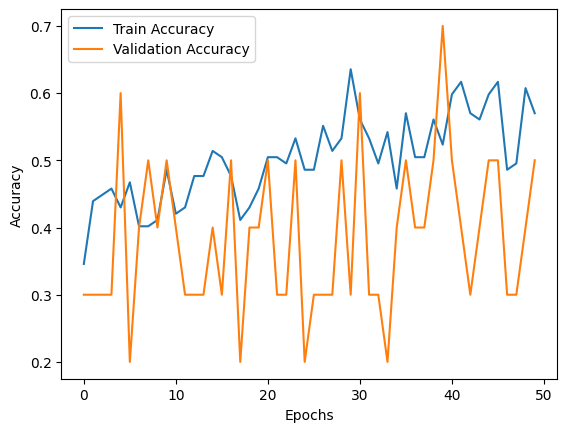

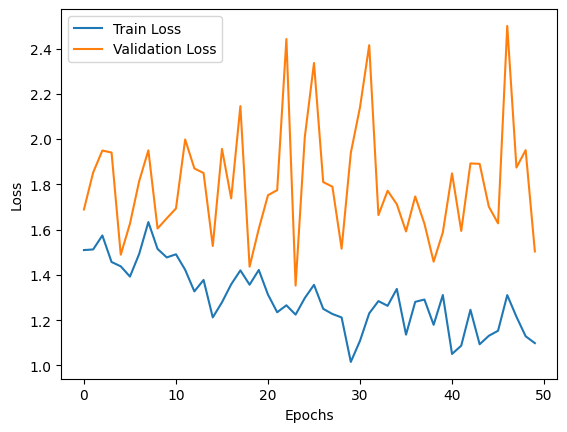

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
loss, accuracy = model_plant.evaluate(val_generator)
print(f"Accuracy: {accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7000 - loss: 1.7520
Accuracy: 70.00%


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
import random

def predict_and_visualize_random(val_generator, model, num_images=10):
    """
    Predict and visualize the results for randomly selected validation images.

    Args:
        val_generator: The validation generator.
        model: Trained CNN model.
        num_images: Number of random images to test.
    """
    # Randomly select indices for validation images
    random_indices = random.sample(range(len(val_generator.filepaths)), num_images)
    print(random_indices)

    plt.figure(figsize=(15, 15))
    for i, idx in enumerate(random_indices):
        # Get the image path and true label
        image_path = val_generator.filepaths[idx]
        true_label = list(val_generator.class_indices.keys())[val_generator.classes[idx]]

        # Load and preprocess the image
        img = load_img(image_path, target_size=(128, 128))
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Predict the class
        predictions = model.predict(img_array)
        predicted_class = list(val_generator.class_indices.keys())[np.argmax(predictions[0])]

        # Plot the image with prediction and true label
        plt.subplot(5, 2, i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"\n {true_label}\n AI: {predicted_class}")
        #print('*'*50)

    plt.tight_layout()
    plt.show()


[3, 7, 4, 2, 1, 5, 6, 9, 0, 8]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 686ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


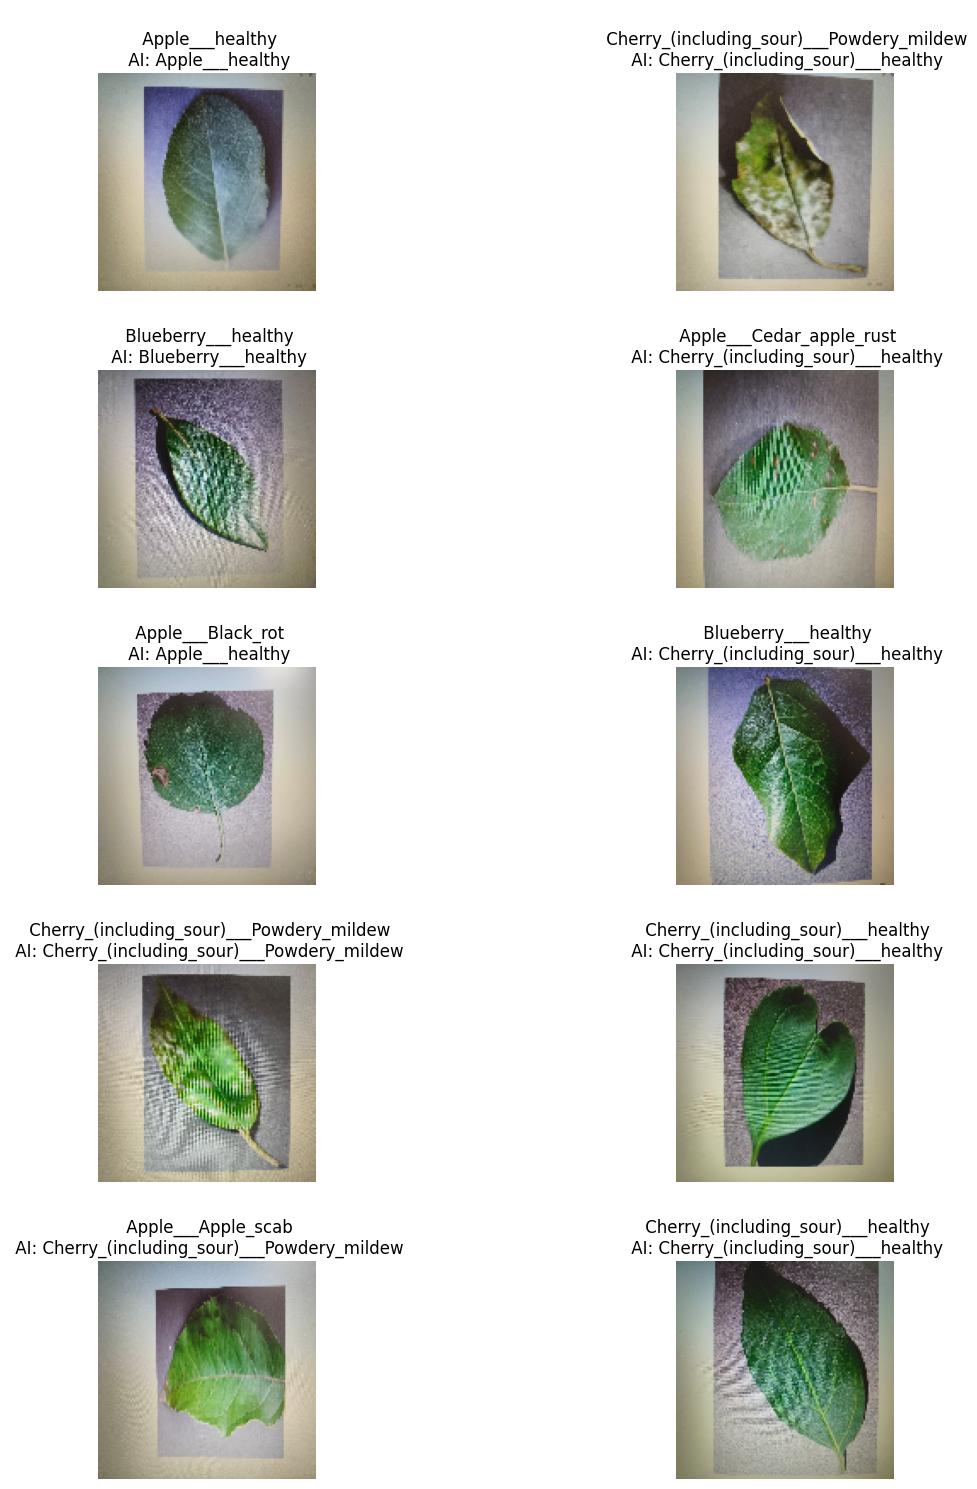

In [ ]:
predict_and_visualize_random(val_generator, model_plant, num_images=10)

[8, 4, 0, 7, 6, 5, 1, 2, 3, 9]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


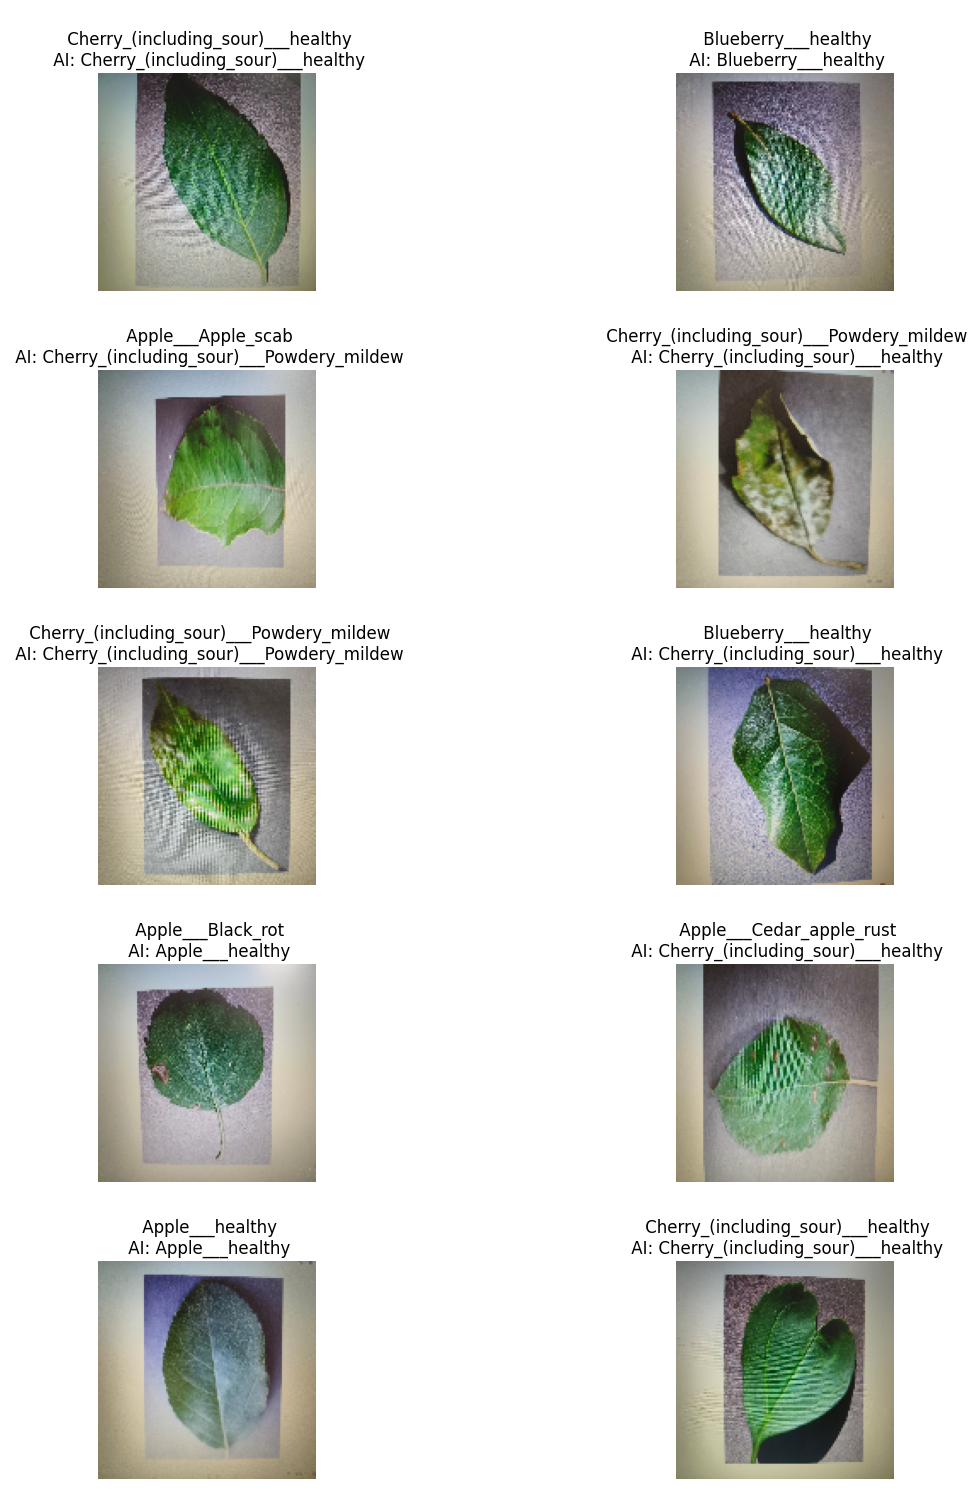

In [ ]:
predict_and_visualize_random(val_generator, model_plant, num_images=10)